In [1]:
!pip install matplotlib

In [3]:
import pandas as pd
import numpy as np
import datetime
import random
import matplotlib.pyplot as plt
from operator import itemgetter

In [88]:
columns = [ "Date", "Mentor", "Qoniqarsiz", "Qoniqarli", "Namunali"]
mentor_name = [ "Azodov Sarvar", "Olloyorov Sirojiddin", "Rasulov Rahmatulloh", "Shomurodov Sarvarbek", "Shukurov Jasur", "Azizova Aziza", "Arslanova Nodira", "Alimbayeva Asalbonu", "Orifjonov Abdulaziz" ]
qoniqarsiz = ["Mentor o'z vaqtida ish joyida yo'q", "Mentor umuman yordam bera olmadi", "Mentor yordam berishdan bosh tortdi"]
qoniqarli = ["Mentor ish joyiga kech keldi", "Mentor savolimga toliq jovob berolmadi", "Mentor javob berdi ammo muomilasizlik blan"]
namunali = ["Mentor o'z vaqtida ish joyida", "Mentor barcha savoimga javob berdi", "Mentor juda ham yaxshi tushuntirdi", "Mentor yangicha va qiziqarli usulda taqdimot qilib tushuntirdi"]
baxo = {"Qoniqarsiz":qoniqarsiz,"Qoniqarli":qoniqarli, "Namunali":namunali }

In [89]:
# def real_date_get():                        # search date = datetime.datetime(2022, 6, 1)   # 1-year, 2-mounth, 3-day
#     day = datetime.datetime.now()           # left = datetime.datetime(2022, 6, 1)
#     return day                              # right = datetime.datetime(2022, 6, 1)
def real_date_get():
    a = random.randint(1, 28)
    b = random.randint(1, 12)
    x = datetime.datetime(2022, b, a)
    return x

In [90]:
def feak_dataset():
    data1 = []
    for x in range(1000):
        rm_date = real_date_get()
        rm_mentor = random.choice(mentor_name)
        ball_name = random.choice(list( baxo.keys() ))
        ball_value = random.choice ( baxo[ball_name] )
        data1.append( { "Date":rm_date, "Mentor":rm_mentor, ball_name:ball_value,} )
    return pd.DataFrame(data=data1, columns=columns)
data = feak_dataset()
data

,Date,Mentor,Qoniqarsiz,Qoniqarli,Namunali
0,2022-06-27,Olloyorov Sirojiddin,Mentor o'z vaqtida ish joyida yo'q,NaN,NaN
1,2022-03-26,Azizova Aziza,NaN,Mentor javob berdi ammo muomilasizlik blan,NaN
2,2022-08-04,Azizova Aziza,NaN,Mentor ish joyiga kech keldi,NaN
3,2022-11-25,Azizova Aziza,NaN,NaN,Mentor yangicha va qiziqarli usulda taqdimot q...
4,2022-10-18,Orifjonov Abdulaziz,NaN,Mentor savolimga toliq jovob berolmadi,NaN
...,...,...,...,...,...
995,2022-11-06,Olloyorov Sirojiddin,Mentor o'z vaqtida ish joyida yo'q,NaN,NaN
996,2022-12-23,Arslanova Nodira,NaN,Mentor savolimga toliq jovob berolmadi,NaN
997,2022-06-12,Alimbayeva Asalbonu,NaN,Mentor ish joyiga kech keldi,NaN
998,2022-04-10,Rasulov Rahmatulloh,NaN,NaN,Mentor yangicha va qiziqarli usulda taqdimot q...


In [91]:
# Kiritilgan sana boyicha mentorni datasetini olish
def date_get(mentor, left=None, right=None):
    mentor = data[ data["Mentor"] == mentor ]
    if left:
        mentor = mentor[data["Date"] >= left ]
    if right:
        mentor =  mentor[data["Date"] <= right ]
    return mentor.sort_values(by='Date')

In [92]:
# Mentorlarni Qoniqarsiz hulosalarini olish
def qoniqarsiz_hulosa_olish( mentor_data ):
    iw_joyi = len( mentor_data[ mentor_data["Qoniqarsiz"] == qoniqarsiz[0] ] )
    yordam_berwdan_bow = len( mentor_data[ mentor_data["Qoniqarsiz"] == qoniqarsiz[1] ] )
    yordam_berolmadi = len( mentor_data[ mentor_data["Qoniqarsiz"] == qoniqarsiz[2] ] )
    return pd.DataFrame([[iw_joyi ,yordam_berwdan_bow,yordam_berolmadi]], columns=["Mentor o'z vaqtida ish joyida yo'q", "Mentor yordam berishdan bosh tortdi", "Mentor umuman yordam bera olmadi"])

In [93]:
# Mentorlarni Qoniqarli hulosalarini olish
def qoniqarli_hulosa_olish( mentor_data ):
    iw_joyi_kech_keldi = len( mentor_data[ mentor_data["Qoniqarli"] == qoniqarli[0]] )
    toliq_javob_bermadi = len( mentor_data[ mentor_data["Qoniqarli"] == qoniqarli[1]] )
    muomlasizlik = len( mentor_data[ mentor_data["Qoniqarli"] == qoniqarli[2]] )
    return pd.DataFrame([[iw_joyi_kech_keldi ,toliq_javob_bermadi,muomlasizlik]], columns=[qoniqarli[0], qoniqarli[1], qoniqarli[2]])

In [94]:
# Mentorlarni Namunali hulosalarini olish
def namunali_hulosa_olish( mentor_data ):
    javob = len( mentor_data[ mentor_data["Namunali"] == namunali[0]] )
    yaxw_javob = len( mentor_data[ mentor_data["Namunali"] == namunali[1]] )
    zor_javob = len( mentor_data[ mentor_data["Namunali"] == namunali[2]] )
    return pd.DataFrame([[javob ,yaxw_javob,zor_javob]], columns=[namunali[0], namunali[1], namunali[2]])

In [73]:
# Mentorga qoyilgan reaksiyalarni hulosasini olish df shaklida
def mentor_reaksiya_olish_df( mentor ):
    q =  qoniqarsiz_hulosa_olish( mentor )
    name = q.columns
    Qoniqarsiz = int( q[ name[0] ].values +  q[ name[0] ].values  + q[ name[0] ].values )
    q1 = qoniqarli_hulosa_olish( mentor)
    name1 = q1.columns
    Qoniqarli =   int( q1[name1[0]].values + q1[name1[1]].values + q1[name1[2]].values )
    q2 = namunali_hulosa_olish( mentor )
    name2 = q2.columns
    Namunali = int( q2[ name2[0] ].values + q2[ name2[1] ].values + q2[ name2[2] ].values )
    return pd.DataFrame ( [[Qoniqarsiz , Qoniqarli , Namunali]], columns=baxo.keys() )

In [74]:
# Mentorni umumiy hulosasini ball shaklida olish
def mentor_umumiy_hulosa_olish_ball( mentor_data ):
    q =  qoniqarsiz_hulosa_olish( mentor_data )
    name = q.columns
    Qoniqarsiz =  ( -2 * q[ name[0] ].values ) + ( -3 *q[ name[0] ].values ) + ( -1 * q[ name[0] ].values )

    q1 = qoniqarli_hulosa_olish( mentor_data )
    name1 = q1.columns
    Qoniqarli =   ( q1[name1[0]].values + q1[name1[1]].values + q1[name1[2]].values ) / 2

    q2 = namunali_hulosa_olish( mentor_data )
    name2 = q2.columns
    Namunali = q2[ name2[0] ].values + ( q2[ name2[1] ].values * 2 ) + ( q2[ name2[2] ].values * 3 )

    return Qoniqarsiz + Qoniqarli + Namunali

In [75]:
# Barcha mentorlarni va ballarini yegish dict shaklida
def all_ball( left=None, right=None):
    data_dict = {}
    for x in mentor_name:
        all_data = date_get( x, left, right)
        data_dict[x] = int( mentor_umumiy_hulosa_olish_ball( all_data ) )
    return data_dict

In [76]:
plt.style.use("dark_background")
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey

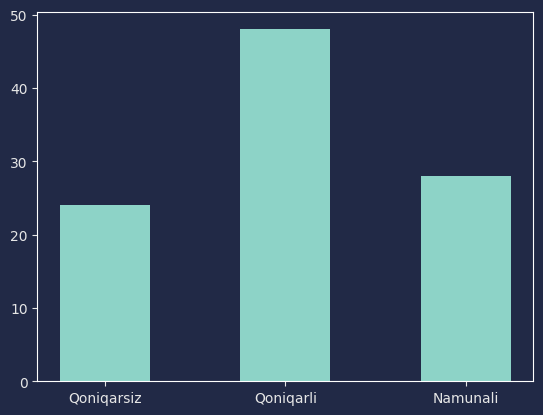

In [77]:
# Mentorni datasetini kirgazsa bar plot shaklida reaksiyani vizualizatsiya qiladi
def vizual_mentor_bar(data1):
    data2 = mentor_reaksiya_olish_df( data1 )
    plt.style.use("dark_background")
    for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
        plt.rcParams[param] = '0.9'  # very light grey
    for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
        plt.rcParams[param] = '#212946'  # bluish dark grey

    plt.bar( ["Qoniqarsiz", "Qoniqarli", "Namunali"], [ int ( data2.Qoniqarsiz.values ) , int(  data2.Qoniqarli.values ),
                                                      int( data2.Namunali.values )], 0.5 )
    plt.show()
Abdulaziz_data = date_get("Abdulaziz")
vizual_mentor_bar(Abdulaziz_data)

In [78]:
# Kiritilgan sana boyicha harkunlik mentorni ballni olib beradi dict shaklida  ( keys=sana, values=ball )
def all_date_get_ball(mentor,left=None, right=None ):
    data_dict = {}
    data1 = date_get(mentor,left=left, right=right )
    data2 = data1.Date.unique()
    for x in data2:
        data_dict[x] = mentor_umumiy_hulosa_olish_ball( data1[data1["Date"] == x] )
    return data_dict

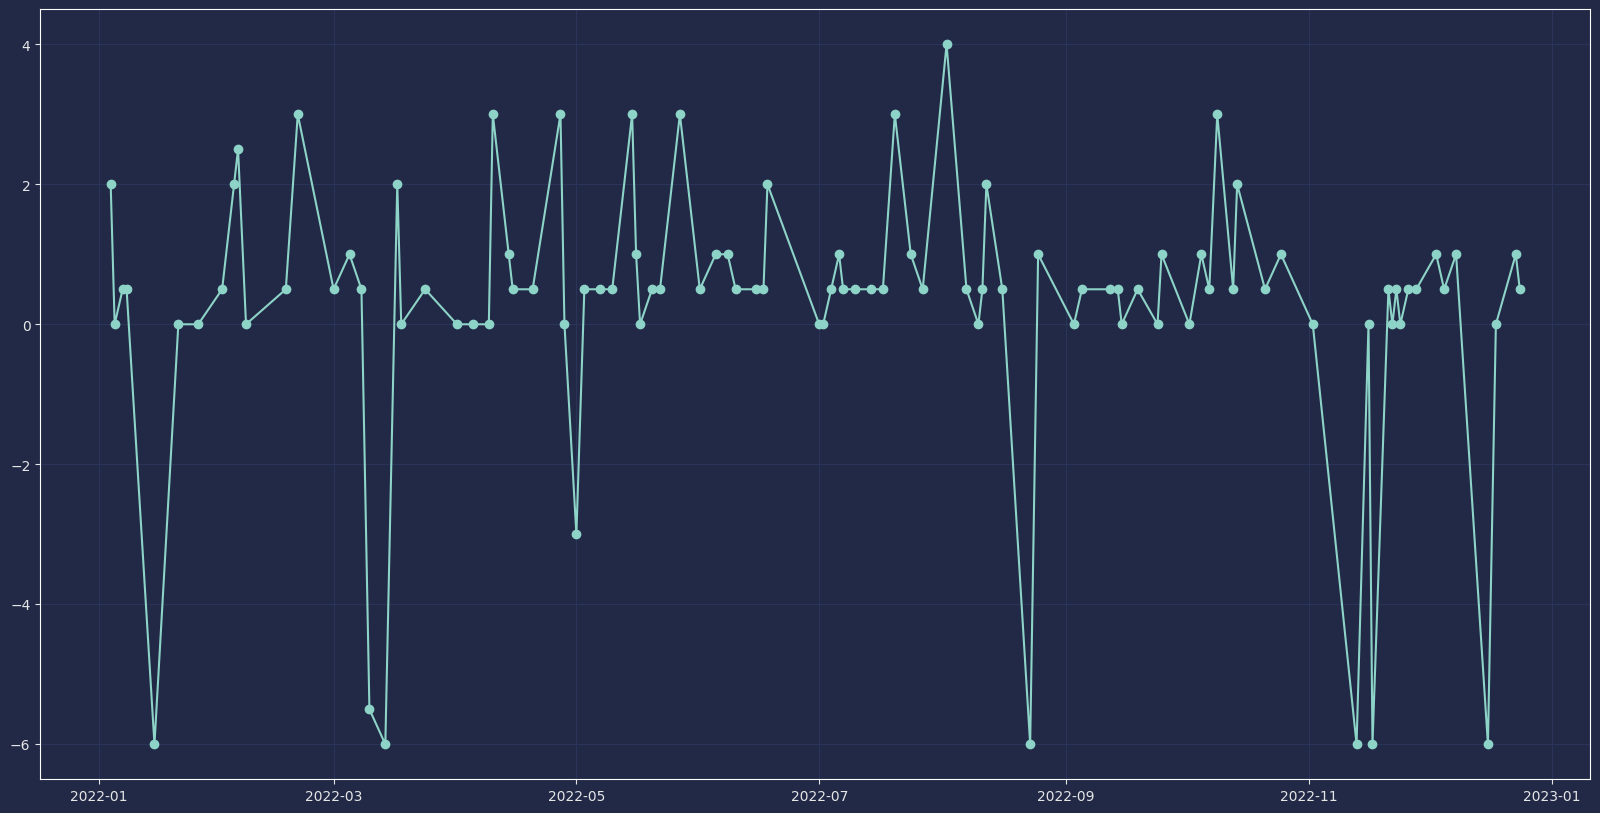

In [79]:
# Mentorni vizualizatsiya qilish sana boyicha plot shaklida
def vizual_plot(mentor,left=None, right=None ):
    data_dict = all_date_get_ball(mentor,left=left, right=right )
    keys = list( data_dict.keys() )
    values = list( data_dict.values() )
    plt.style.use("dark_background")
    for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
        plt.rcParams[param] = '0.9'  # very light grey
    for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
        plt.rcParams[param] = '#212946'  # bluish dark grey
    plt.figure(figsize = (20, 10))
    plt.plot(keys, values,marker='o')
    plt.grid(color='#2A3459')
    plt.show()
    # plt.savefig('/Users/student/PycharmProjects/Analiz_bot/plot.jpeg', bbox_inches='tight', transparent=True)
vizual_plot("Abdulaziz")

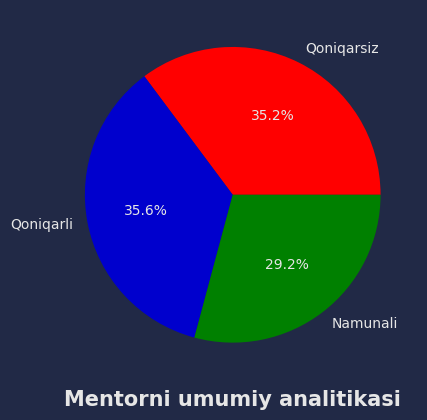

In [80]:
def pie():
    data2 = mentor_reaksiya_olish_df( data )
    mycolors = ["red", "#0000CD", "green"]
    # plt.subplot(figsize=(20,5))
    plt.pie( [ int ( data2.Qoniqarsiz.values ) , int(  data2.Qoniqarli.values ), int( data2.Namunali.values )],labels = ["Qoniqarsiz", "Qoniqarli", "Namunali"], colors=mycolors,autopct = '%1.1f%%' )
    plt.xlabel('Mentorni umumiy analitikasi', fontweight ='bold', fontsize = 15)
    plt.savefig('image/mentor_plot.png', bbox_inches='tight', transparent=True)
    plt.show()

pie()

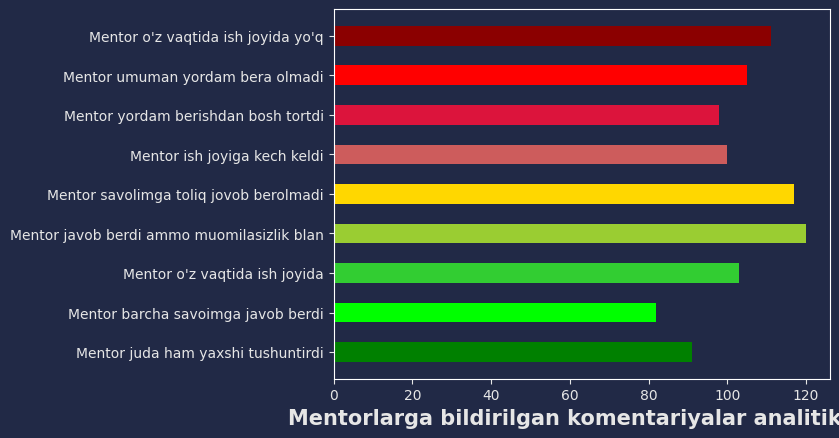

In [81]:
def koment_bar(data):
    qoniqarsiz1 = qoniqarsiz_hulosa_olish(data)
    qoniqarli1 = qoniqarli_hulosa_olish(data)
    namunali1 = namunali_hulosa_olish(data)
    data_dict1 = {}
    for x in qoniqarsiz1.columns:
        data_dict1[x] = int( qoniqarsiz1[x].values )
    for x in qoniqarli1.columns:
        data_dict1[x] = int( qoniqarli1[x].values )
    for x in namunali1.columns:
        data_dict1[x] = int( namunali1[x].values )
    keys = list( data_dict1.keys() )
    values = list (data_dict1.values() )
    plt.subplot()
    plt.barh(keys[8], values[8] , 0.5, color='g')
    plt.barh(keys[7], values[7] , 0.5, color='#00FF00')
    plt.barh(keys[6], values[6] , 0.5, color='#32CD32')
    plt.barh(keys[5], values[5] , 0.5, color='#9ACD32')
    plt.barh(keys[4], values[4] , 0.5, color='#FFD700')
    plt.barh(keys[3], values[3] , 0.5, color='#CD5C5C')
    plt.barh(keys[1], values[1] , 0.5, color='#DC143C')
    plt.barh(keys[2], values[2] , 0.5, color='r')
    plt.barh(keys[0], values[0] , 0.5, color='#8B0000')
    plt.xlabel('Mentorlarga bildirilgan komentariyalar analitikasi', fontweight ='bold', fontsize = 15)
    plt.savefig('image/coments.png', bbox_inches='tight', transparent=True)
    plt.show()
koment_bar(data)

In [105]:
def all_bar_all(left=None, right=None):
    result = {}
    for x in mentor_name:
        data1 =  date_get(x, left,right)
        data2 = mentor_reaksiya_olish_df( data1 )
        data3 = [ int(data2.Qoniqarsiz.values), int(data2.Qoniqarli.values), int(data2.Namunali.values) ]
        result[x] = data3

    data_dict = all_ball( left, right)
    sort = dict ( sorted( data_dict.items(), key = itemgetter(1), reverse = False ) )
    keys = list( sort.keys() )
    values = list (sort.values() )
    plt.style.use("dark_background")
    for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
        plt.rcParams[param] = '0.9'  # very light grey
    for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
        plt.rcParams[param] = '#212946'  # bluish dark grey

    fig, ax = plt.subplots(1,2,figsize=(20,5))
    ax[0].barh(keys, values , 0.5, color='#6A5ACD')
    ax[0].set_xlabel('Mentorlarni umumiy analitikasi', fontweight ='bold', fontsize = 15)

    # set width of bar
    barWidth = 0.25

    # set height of bar
    qoniqarsiz1 = [ x[0] for x in result.values() ]
    qoniqarli1 = [ x[1] for x in result.values() ]
    namunali1 = [ x[2] for x in result.values() ]

    # Set position of bar on X axis
    br1 = np.arange(len(qoniqarsiz1))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]

    # Make the plot
    ax[1].bar(br1, qoniqarsiz1, color ='r', width = barWidth, edgecolor ='grey', label ='Qoniqarsiz')
    ax[1].bar(br2, qoniqarli1, color ='#00BFFF', width = barWidth, edgecolor ='grey', label ='Qoniqarli')
    ax[1].bar(br3, namunali1, color ='#00FF00', width = barWidth, edgecolor ='grey', label ='Namunali')

    # Adding Xticks
    ax[1].set_xlabel('Mentorlarni umumiy analitikasi', fontweight ='bold', fontsize = 15)
    ax[1].set_xticks([r + barWidth for r in range(len(qoniqarsiz1))], mentor_name ,rotation=90)
    ax[1].legend()
    plt.savefig('image/all_plots.png', bbox_inches='tight')
    # plt.show()
    plt.close()

all_bar_all()